# Implementation from Scratch

<br />

I am going to implement algorithms by using the least kinds of libraries such as Numpy possible.

In [1]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

## [Task 1] Implement a Class of Logistic Regression

#### Sigmoid Function

<br />

$$
g(z) = \frac{1}{1+e^{−z}}
$$

In [2]:
# Validate the function

for z in range(-10,11):
    print(1 / (1+math.e**(-z)))

4.539786870243442e-05
0.0001233945759862318
0.00033535013046647827
0.0009110511944006456
0.002472623156634775
0.006692850924284857
0.017986209962091562
0.04742587317756679
0.11920292202211757
0.2689414213699951
0.5
0.7310585786300049
0.8807970779778823
0.9525741268224331
0.9820137900379085
0.9933071490757153
0.9975273768433653
0.9990889488055994
0.9996646498695336
0.9998766054240137
0.9999546021312976


#### Objective Function

<br />

I will implement the objective function of logistic regression, $J$ including a regularization term.

$$
h_\theta(x) = g(\theta^T x)
$$

$$
g(z) = \frac{1}{1+e^{−z}}
$$

$$
J(\theta)=  \frac{1}{m}  \sum_{i=1}^{m}[−y^{(i)} log(h_\theta(x^{(i)})) − (1−y^{(i)}) log(1−h_\theta(x^{(i)}))] + \frac{\lambda}{2m}\sum_{j=1}^n\theta^2_j
$$

$m$: the number of data

$h_\theta()$: hypothesis function

$x$: feature vector

$\theta$: parameter vector

$g()$: sigmoid function

$x^{(i)}$: feature vector of ith sample

$y^{(i)}$: correct label of ith sample

$\theta_j$: jth parameter(weight)

$\lambda$: regularization parameter

#### Steepest Descent Method

<br />

I fit datasets by the steepest decsent method. I will use the following equations to update the bias term and the jth parameter.

$$
\frac{\partial J(\theta)}{\partial \theta_0} = \frac{1}{m}  \sum_{i=1}^{m}(h_\theta(x^{(i)}) − y^{(i)})x_j^{(i)},\ \ \ \ \ j = 0
$$

$$
\frac{\partial J(\theta)}{\partial \theta_j} = \biggl(\frac{1}{m}  \sum_{i=1}^{m}(h_\theta(x^{(i)}) − y^{(i)})x_j^{(i)} \biggr) + \frac{\lambda}{m}\theta_j,\ \ \ \ \ j\geq 1
$$

$i$: index of a sample

$j$: index of a feature

In [3]:
# Create a class of logistic regression from scratch

class ScratchLogisticRegression():
    """
    Implement logistic regression from scratch.
    
    Parameters
    ----------
    num_iter: int
        The number of iteration
    
    lr: float
        Learning rate
    
    reg: float
        Regularization parameter
    
    bias: bool
        True if input the bias term
    
    verbose: bool
        True if output the learning process
    
    
    Attributes
    ----------
    self.coef_: ndarray, shape(n_features,)
        parameters
    
    self.loss: ndarray, shape(self.iter,)
        records of loss on train dataset
    
    self.val_loss: ndarray, shape(self.iter,)
        records of loss on validation dataset
    """
    
    def __init__(self, num_iter, lr, reg, bias, verbose):
        # Record hyperparameters as attribute
        self.iter = num_iter
        self.lr = lr
        self.reg = reg
        self.bias = bias
        self.verbose = verbose
        
        # Prepare arrays for recording loss
        self.loss = np.zeros(self.iter)
        self.val_loss = np.zeros(self.iter)
    
    
    def fit(self, X, y, X_val=None, y_val=None):
        """
        Fit datasets by logistic regression. In a case of inputting validation dataset, return the loss 
        and the accuracy of datasets per iteration.
        
        Parameters
        ----------
        X: ndarray, shape(n_samples,n_features)
            Features of train dataset
        
        y: ndarray, shape(n_samples,)
            Correct values of train dataset
        
        X_val: ndarray, shape(n_samples,n_features)
            Features of validation dataset
        
        y_val: ndarray, shape(n_samples,)
            Correct values of validation dataset
        """
        
        ###print("fit-1, X=",X.shape)   # (80,2)
        ###print("fit-2, y=",y.shape)   # (80,)
        ###print("fit-101, X_val=",X_val.shape)   # (20,2)
        ###print("fit-102, y_val=",y_val.shape)   # (20,)
        
        # Change objective vectors to matrixes
        y = y.reshape(len(y), 1)
        if (X_val is not None) and (y_val is not None):
            y_val = y_val.reshape(len(y_val), 1)
        
        # Add a bias term if self.bias is True
        if self.bias == True:
            # Create arrays of biases
            X_bias = np.array([1 for _ in range(X.shape[0])])
            if (X_val is not None) and (y_val is not None):
                X_val_bias = np.array([1 for _ in range(X_val.shape[0])])
            
            # Change the vectors to matrixes
            X_bias = X_bias.reshape(len(X_bias), 1)
            if (X_val is not None) and (y_val is not None):
                X_val_bias = X_val_bias.reshape(len(X_val_bias), 1)
            ###print("fit-3, X_bias=",X_bias.shape)   # (80,1)
            ###print("fit-4, X_val_bias=",X_val_bias.shape)   # (20,1)
            
            # Add the biases
            X = np.hstack((X_bias, X))
            if (X_val is not None) and (y_val is not None):
                X_val = np.hstack((X_val_bias, X_val))
        
        # Change the arrays to lists
        y = y.tolist()
        if (X_val is not None) and (y_val is not None):
            y_val = y_val.tolist()
        
        # Change the original values of the lists to only 2 kinds of values, 0 and 1
        y = [1 if i == max(y) else 0 for i in y]
        if (X_val is not None) and (y_val is not None):
            y_val = [1 if i == max(y_val) else 0 for i in y_val]
        
        # Change the lists to arrays
        y = np.array(y)
        if (X_val is not None) and (y_val is not None):
            y_val = np.array(y_val)
        
        # Change the vectors to matrixes
        y = y.reshape(1, len(y))
        if (X_val is not None) and (y_val is not None):
            y_val = y_val.reshape(1, len(y_val))
        
        # Transform arrays to move their features to rows
        X = X.T
        if (X_val is not None) and (y_val is not None):
            X_val = X_val.T
        
        ###print("fit-5, X=",X.shape)   # (3,80)
        ###print("fit-6, y=",y.shape)   # (1,80)
        ###if (X_val is not None) and (y_val is not None):
            ###print("fit-103, X_val=",X_val.shape)   # (3,20)
            ###print("fit-104, y_val=",y_val.shape)   # (1,20)
        
        # Set a hypothesis parameter randomly and transform it
        self.coef_ = np.random.randn(X.shape[0])
        
        # Change the vector to a matrix
        self.coef_ = self.coef_.reshape(len(self.coef_), 1)
        ###print("fit-7, self.coef_=",self.coef_.shape)   # (3,1)
        
        # Update the parameter and get loss of train dataset
        for i in range(self.iter):
            # Update the parameter
            self.coef_ = self._gradient_descent(X, y)
            ###print("fit-8, self.coef_=",self.coef_.shape)   # (3,1)
            
            # Compute the cross entropy
            cross_entropy = self._compute_cost(X, y)
            ###print("fit-9, cross_entropy=",cross_entropy.shape)   # ()
            
            # Record the errors
            self.loss[i] = cross_entropy
            
            # Return the loss if verbose is True
            if self.verbose:
                print(self.loss[i])
            
            # Get loss of validation datasets
            if (X_val is not None) and (y_val is not None):
                # Get the cross entropy
                val_cross_entropy = self._compute_cost(X_val, y_val)
                
                # Record the errors
                self.val_loss[i] = val_cross_entropy
                
                # Return the loss if verbose is True
                if self.verbose:
                    print(self.val_loss[i])
    
    
    def predict(self, X):
        """
        Predict by logistic regression.
        
        Parameters
        ----------
        X: ndarray, shape(n_samples,n_features)
            Samples
        
        
        Returns
        ----------
        ndarray, shape(n_samples,1)
            Results of the prediction
        """
        
        y_pred = self.predict_proba(X)
        
        # Change a probability that is more than 0.5 to 1 and a probability that is less than or equals to 0.5 to 0
        pred_list = []
        for i in y_pred[0]:
            pred_list.append(round(i))
        
        # Change the values of the list to integers
        pred_list = list(map(int, pred_list))
        
        return pred_list
    
    
    def predict_proba(self, X):
        """
        Probability estimation for logistic regression.
        
        Parameters
        ----------
        X: ndarray, shape(n_samples,n_features)
            Samples
        
        
        Returns
        ----------
        float
            Probability of 
        """
        
        ###print("predict_proba-1, X=",X.shape)   # (20,2)
        
        # Add a bias if self.bias is True
        if self.bias == True:
            # Create arrays of biases
            X_bias = np.array([1 for _ in range(X.shape[0])])
            
            # Change the vectors to a matrix
            X_bias = X_bias.reshape(len(X_bias), 1)
            
            # Add the biases
            X = np.hstack((X_bias, X))
        
        ###print("predict_proba-2, self.coef_=",self.coef_.shape)   # (3,1)
        ###print("predict_proba-3, X=",X.shape)   # (20,3)
        
        # Predict train dataset
        y_pred = self._linear_hypothesis(X.T)   # (1,3) * (3,20)
        
        return y_pred
    
    
    # Create a definition of sigmoid function
    def _sigmoid_function(self, z):
        """
        Return sigmoid function.
        
        Parameters
        ----------
        z: int
            Index of natural logarithm of sigmoid function
        
        Returns
        ----------
        float
            Results of computation by sigmoid function
        """
        
        # Compute sigmoid function
        return 1 / (1+math.e**(-z))
    
    
    # Create a definition of hypothesis function
    def _linear_hypothesis(self, X):
        """
        Return hypothesis function
        
        Parameters
        ----------
        X: ndarray, shape(n_samples,n_features)
            Train dataset
        
        Returns
        ----------
        ndarray, shape(n_samples,1)
            Results of the prediction by hypothesis function
        """
        
        # Compute an index of linear hypothesis
        z = np.dot(self.coef_.T, X)   #(1,3) * (3,80)
        
        # Compute the hypothesis function
        y_pred = self._sigmoid_function(z)
        ###print("_linear_hypothesis-1, y_pred=",y_pred.shape)   # (1,80) <-> (1,20)
         
        return y_pred
    
    
    # Create a definition to compute the cross entropy
    def _compute_cost(self, X, y):
        """
        Compute the cross entropy. Import the "cross_entropy" definition.

        Parameters
        ----------
        X: ndarray, shape(n_samples,n_features)
            train dataset

        y: ndarray, shape(n_samples,1)
            correct value


        Returns
        ----------
        ndarray, shape(1,)
            cross entropy
        """

        y_pred = self._linear_hypothesis(X)
    
        return self.cross_entropy(y_pred, y)
    
    
    # Create a definition of the cross entropy
    def cross_entropy(self, y_pred, y):
        """
        Compute the cross entropy.
        
        Parameters
        ----------
        y_pred: ndarray, shape(n_samples,)
            predited value
        
        y: ndarray, shape(n_samples,)
            correct value
        
        
        Returns
        ----------
        cross_entropy: numpy.float
            cross entropy
        """
        
        ###print("cross_entropy-1, y_pred=",y_pred.shape)   # (1,80) <-> (1,20)
        
        # Compute a probability that equals to 1
        prob1 = -y * np.log(y_pred)
        
        # Compute a probability that equals to 0
        prob0 = (1-y) * np.log(1-y_pred)
        
        # Compute the joint probability
        joint_prob = prob1 - prob0
        
        # Sum the joint probabilities
        sum_joint_probs = np.sum(joint_prob)
        
        # Compute a regularization term
        term_reg = self.reg/(2*y.shape[1])*np.sum(self.coef_**2)
        
        # Compute the cross entropy
        return sum_joint_probs/y.shape[1] + term_reg
    
    
    # Create a definition to fit datasets by steepest descent method
    def _gradient_descent(self, X, y):
        """
        Fit datasets by steepest descent method
        
        Parameters
        ----------
        X: ndarray, shape(n_samples,n_features)
            train dataset
        
        y: ndarray, shape(n_samples,1)
            correct value
        
        
        Returns
        ----------
        ndarray, shape(1,)
            parameter(weight)
        """
        
        # Predict train dataset
        y_pred = self._linear_hypothesis(X)
        ###print("_gradient_decsent-1, y_pred=",y_pred.shape)  # (1,80)
        
        ###print("_gradient_decsent-2, y=",y.shape)   # (1,80)
        
        # Compute the error
        error = y_pred - y
        ###print("_gradient_decsent-3, error=",error.shape)   # (1,80)
        
        # Compute the gradient
        grad = np.dot(X, error.T)   # (3,80) * (80,1)
        ###print("_gradient_decsent-4, grad=",grad.shape)   # (3,1)
        
        # Sum gradients
        sum_grads = np.sum(grad)
        
        # Compute the regularization term
        reg_term = self.reg / y.shape[1] * self.coef_
        ###print("_gradient_descent-5, reg_term=",reg_term)
        
        # Update the parameter
        if self.bias == False:
            return self.coef_ - self.lr*(grad/y.shape[1] + reg_term)
        else:
            # Change the (1,1) element to 0
            reg_term[0,0] = 0
            ###print("_gradient_descent-6, reg_term=",reg_term)
            return self.coef_ - self.lr*(grad/y.shape[1] + reg_term)
    
    
    # Plot learning records
    def plot_learning_record(self):
        """
        Plot learning records.
        """
        
        plt.plot(self.loss, label="loss")
        plt.plot(self.val_loss, label="val_loss")
        
        plt.title("Learning Records")
        plt.xlabel("Number of Iterrations")
        plt.ylabel("Loss")
        plt.grid(True)
        
        plt.legend()
        plt.show()
    
    
    # Compute index values
    def compute_index_values(self, X, y):
        """
        Compute Index values.
        
        Parameters
        ----------
        X: ndarray, shape(n_samples,n_features)
            Features of train dataset
        
        y: ndarray, shape(n_samples,)
            Correct values of train dataset
        """
        
        y_pred = self.predict(X)
        
        # Change values of y to only 2 kinds of values, 0 and 1
        y = [1 if i == max(y) else 0 for i in y]
        
        ###print("compute_index_values-1, y_pred=", y_pred)
        ###print("compute_index_values-2, y=", y)
        
        ###print("compute_index_values-3, y_pred=", len(y_pred))   # 20
        ###print("compute_index_values-4, y=", len(y))   # 20
        
        # Return index values
        print("accuracy score: ", accuracy_score(y, y_pred))
        print("precision score: ", precision_score(y, y_pred))
        print("recall score: ", recall_score(y, y_pred))
        print("f1 score: ", precision_score(y, y_pred))
        print("confusion matrix:")
        print(confusion_matrix(y, y_pred))
    
    
    def decision_boundary(self, X, y, step=0.01, title="Decision Boundary", xlabel="Number of Iteration", ylabel="Loss", 
                        target_names=["setosa", "virginica"]):
        """
        Plot a decision boundary of a model fitting binary classification by 2-dimentional features.

        Parameters
        ----------------
        X : ndarray, shape(n_samples, 2)
            Features of train dataset
        
        y : ndarray, shape(n_samples,)
            Correct values of train dataset
        
        step : float, (default : 0.1)
            Set intervals to compute the prediction
        
        title : str
            Input the title of the graph
        
        xlabel, ylabel : str
            Input names of each axis
        
        target_names= : list of str
            Input a list of the legends
        """
        
        # Setting
        scatter_color = ["r", "b"]
        contourf_color = ["pink", "skyblue"]
        n_class = 2

        # Predict
        mesh_f0, mesh_f1  = np.meshgrid(np.arange(np.min(X[:,0])-0.5, np.max(X[:,0])+0.5, step), 
                                        np.arange(np.min(X[:,1])-0.5, np.max(X[:,1])+0.5, step))
        mesh = np.c_[np.ravel(mesh_f0), np.ravel(mesh_f1)]
        pred = self.predict_proba(mesh).reshape(mesh_f0.shape)

        # Plot
        plt.title(title)
        plt.xlabel(xlabel)
        plt.ylabel(ylabel)
        plt.contourf(mesh_f0, mesh_f1, pred, n_class-1, cmap=ListedColormap(contourf_color))
        plt.contour(mesh_f0, mesh_f1, pred, n_class-1, colors='y', linewidths=3, alpha=0.5)
        for i, target in enumerate(set(y)):
            plt.scatter(X[y==target][:,0], X[y==target][:,1], s=80, color=scatter_color[i], label=target_names[i], marker='o')
        patches = [mpatches.Patch(color=scatter_color[i], label=target_names[i]) for i in range(n_class)]
        plt.legend(handles=patches)
        plt.legend()
        plt.show()

### Validate the Class

<br />

I am going to validate the class by using the iris datasets.

In [4]:
# Prepare a dataset for the validation

# Import the dataset
iris = load_iris()

# Split the datasets into explanatory and objective variables
X = iris.data[:,[1,2]]
X = X[iris.target!=1]
y = iris.target[iris.target!=1]

# Split the datasets into train and test dtasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [5]:
# Check the dataset

iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [6]:
# Validate the processing of the dataset

X

array([[3.5, 1.4],
       [3. , 1.4],
       [3.2, 1.3],
       [3.1, 1.5],
       [3.6, 1.4],
       [3.9, 1.7],
       [3.4, 1.4],
       [3.4, 1.5],
       [2.9, 1.4],
       [3.1, 1.5],
       [3.7, 1.5],
       [3.4, 1.6],
       [3. , 1.4],
       [3. , 1.1],
       [4. , 1.2],
       [4.4, 1.5],
       [3.9, 1.3],
       [3.5, 1.4],
       [3.8, 1.7],
       [3.8, 1.5],
       [3.4, 1.7],
       [3.7, 1.5],
       [3.6, 1. ],
       [3.3, 1.7],
       [3.4, 1.9],
       [3. , 1.6],
       [3.4, 1.6],
       [3.5, 1.5],
       [3.4, 1.4],
       [3.2, 1.6],
       [3.1, 1.6],
       [3.4, 1.5],
       [4.1, 1.5],
       [4.2, 1.4],
       [3.1, 1.5],
       [3.2, 1.2],
       [3.5, 1.3],
       [3.6, 1.4],
       [3. , 1.3],
       [3.4, 1.5],
       [3.5, 1.3],
       [2.3, 1.3],
       [3.2, 1.3],
       [3.5, 1.6],
       [3.8, 1.9],
       [3. , 1.4],
       [3.8, 1.6],
       [3.2, 1.4],
       [3.7, 1.5],
       [3.3, 1.4],
       [3.3, 6. ],
       [2.7, 5.1],
       [3. ,

In [7]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [8]:
print(len(X))
print(len(y))

100
100


In [9]:
# Standardize the dataset

# Initialize the class
scaler = StandardScaler()

# Fit the dataset
scaler.fit(X_train)

# Transfer the datasets
std_X_train = scaler.transform(X_train)

# Fit the dataset
scaler.fit(X_test)

# Transfer the datasets
std_X_test = scaler.transform(X_test)

In [10]:
# Initialize the class
log_reg = ScratchLogisticRegression(num_iter=3000, lr=0.01, reg=0.001, bias=True, verbose=True)

In [11]:
log_reg.fit(std_X_train, y_train, std_X_test, y_test)

1.2548499814604108
0.7906395981309431
1.2511794670256067
0.7873829435859884
1.247519158852877
0.7841380509640986
1.2438690562999901
0.780904926385872
1.2402291584459386
0.7776835754962109
1.2365994640914921
0.774474003463689
1.2329799717597911
0.7712762149800062
1.2293706796969783
0.7680902142595367
1.2257715858728748
0.7649160050389654
1.222182687981689
0.7617535905770174
1.2186039834427702
0.7586029736542763
1.2150354694013974
0.755464156573095
1.2114771427296098
0.7523371411575969
1.207929000027071
0.7492219287537667
1.204391037621977
0.7461185202296327
1.200863251571996
0.7430269159755392
1.1973456376652474
0.7399471159045103
1.1938381914213194
0.7368791194526997
1.1903409080923197
0.733822925579935
1.1868537826639638
0.7307785327703491
1.1833768098566988
0.7277459390330973
1.1799099841268599
0.7247251419031703
1.1764532996678654
0.7217161384422878
1.1730067504114425
0.7187189252398842
1.1695703300288864
0.7157334984141802
1.1661440319323568
0.7127598536133395
1.1627278492761985
0.

0.31264330105589455
0.14467709801925108
0.3120304518758054
0.1444358491918238
0.31141936634980566
0.14419551844729206
0.31081003833128473
0.1439561009606393
0.31020246169927645
0.14371759193639105
0.30959663035833557
0.14347998660842304
0.30899253823841405
0.1432432802397717
0.3083901792947385
0.14300746812244472
0.3077895475076884
0.1427725455772335
0.3071906368826735
0.14253850795352682
0.3065934414500139
0.14230535062912508
0.3059979552648187
0.14207306901005637
0.30540417240686674
0.1418416585303932
0.30481208698048673
0.14161111465207082
0.3042216931144387
0.14138143286470609
0.3036329849617957
0.14115260868541796
0.3030459566998261
0.14092463765864918
0.3024606025298762
0.14069751535598868
0.30187691667725436
0.1404712373759952
0.30129489339111387
0.14024579934402231
0.3007145269443385
0.14002119691204454
0.3001358116334268
0.1397974257584839
0.2995587417783782
0.13957448158803837
0.2989833117225788
0.1393523601315112
0.29840951583268827
0.13913105714564108
0.297837348498527
0.13

0.12564318546633657
0.07728501680810576
0.12550511990761873
0.07723415579396817
0.1253673334052646
0.07718338042146262
0.12522982521231207
0.07713269045563566
0.1250925945841044
0.0770820856624101
0.12495564077828303
0.07703156580858113
0.12481896305477949
0.07698113066181234
0.12468256067580843
0.07693077999063162
0.12454643290585986
0.07688051356442732
0.12441057901169182
0.07683033115344425
0.12427499826232292
0.07678023252877973
0.12413968992902495
0.0767302174623797
0.12400465328531544
0.07668028572703488
0.12386988760695045
0.07663043709637693
0.12373539217191724
0.07658067134487449
0.12360116626042673
0.07653098824782957
0.12346720915490658
0.0764813875813735
0.12333352013999367
0.07643186912246334
0.12320009850252701
0.07638243264887809
0.12306694353154045
0.07633307793921487
0.12293405451825559
0.07628380477288532
0.12280143075607447
0.07623461293011173
0.12266907154057276
0.07618550219192363
0.1225369761694923
0.07613647234015386
0.12240514394273407
0.07608752315743501
0.1222

0.07844335280632117
0.05835172245543644
0.07838770376964646
0.05832674441836557
0.07833213365918223
0.058301793074373484
0.07827664231331277
0.058276868376841415
0.07822122957083996
0.05825197027926497
0.07816589527098244
0.05822709873525352
0.07811063925337423
0.05820225369853022
0.07805546135806338
0.05817743512293119
0.07800036142551088
0.058152642962405576
0.07794533929658928
0.058127877171014954
0.0778903948125815
0.058103137702933016
0.07783552781517959
0.058078424512445326
0.07778073814648358
0.05805373755394872
0.07772602564900001
0.05802907678195144
0.07767139016564104
0.0580044421510721
0.07761683153972294
0.05797983361603999
0.0775623496149651
0.05795525113169427
0.07750794423548851
0.05793069465298402
0.07745361524581498
0.05790616413496746
0.07739936249086558
0.05788165953281197
0.0773451858159596
0.05785718080179363
0.07729108506681326
0.05783272789729678
0.07723706008953862
0.057808300774813824
0.07718311073064237
0.05778389938994486
0.07712923683702458
0.057759523698397

0.04657556179133199
0.05438429483607662
0.046561271625996804
0.054357851294623366
0.0465469922552782
0.054331434162473886
0.046532723666069566
0.0543050434002822
0.04651846584528639
0.05427867896877912
0.04650421877986647
0.05425234082877221
0.0464899824567696
0.054226028941145456
0.046475756862977606
0.054199743266859245
0.04646154198549442
0.05417348376695003
0.04644733781134572
0.05414725040253021
0.04643314432757928
0.054121043134788015
0.04641896152126466
0.05409486192498722
0.04640478937949316
0.05406870673446698
0.04639062788937794
0.05404257752464179
0.04637647703805387
0.05401647425700111
0.04636233681267734
0.053990396893109256
0.04634820720042651
0.05396434539460532
0.04633408818850107
0.05393831972320286
0.0463199797641222
0.05391231984068976
0.04630588191453261
0.05388634570892816
0.04629179462699631
0.053860397289854076
0.04627771788879889
0.05383447454547741
0.04626365168724711
0.05380857743788174
0.0462495960096691
0.053782705929223955
0.046235550843414186
0.05375685998

0.04212712609964033
0.0395277109583919
0.042111513767420734
0.03951816343438008
0.04209591341090099
0.039508621571987854
0.042080325016234585
0.03949908536586518
0.04206474856959613
0.039489554810668986
0.04204918405718156
0.03948002990106315
0.04203363146520787
0.03947051063171863
0.04201809077991325
0.03946099699731321
0.04200256198755704
0.03945148899253162
0.04198704507441949
0.039441986612065605
0.041971540026802014
0.03943248985061378
0.04195604683102687
0.039422998702881705
0.041940565473437365
0.03941351316358174
0.04192509594039764
0.03940403322743326
0.04190963821829265
0.03939455888916237
0.04189419229352824
0.03938509014350218
0.04187875815253104
0.039375626985192556
0.04186333578174833
0.03936616940898022
0.04184792516764816
0.03935671740961867
0.04183252629671922
0.039347270981868396
0.0418171391554708
0.03933783012049649
0.041801763730432796
0.03932839482027697
0.04178640000815563
0.0393189650759905
0.0417710479752102
0.039309540882424686
0.041755707618187976
0.039300122

In [12]:
log_reg.predict_proba(std_X_test)

array([[0.99145024, 0.99481305, 0.98898941, 0.13534585, 0.02932979,
        0.05117656, 0.01282223, 0.99829635, 0.02103052, 0.03264721,
        0.02138633, 0.13736434, 0.99130372, 0.00392352, 0.9904601 ,
        0.02422929, 0.98617374, 0.97844888, 0.13534585, 0.05117656]])

In [13]:
log_reg.predict(std_X_test)

[1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0]

# Validation

## [Task 2] Plot Learning Curves

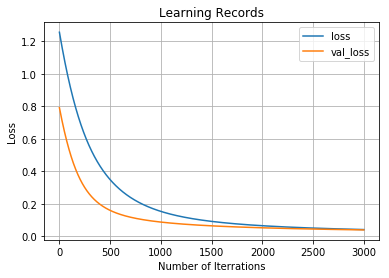

In [14]:
log_reg.plot_learning_record()

## [Task 3] Compute Index Values

In [15]:
log_reg.compute_index_values(std_X_test, y_test)

accuracy score:  1.0
precision score:  1.0
recall score:  1.0
f1 score:  1.0
confusion matrix:
[[12  0]
 [ 0  8]]


## [Task 4] Visualize Decision Boundary

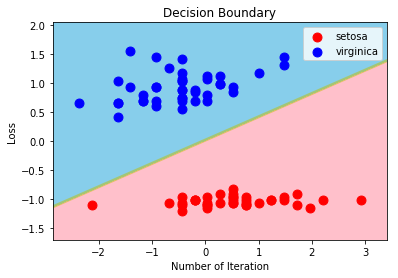

In [16]:
log_reg.decision_boundary(std_X_train, y_train)

## [Task 5] Save Weights

## [Task 6] Discuss about Classification and Regression

    - Classification is to classify given data into any labels.
    
    - On the other hand, regression is to predict values actually.